<a href="https://colab.research.google.com/github/khawar-khan520/CRUD-system/blob/master/retrieval_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install and Import Libraries:

In [1]:
!pip install openai sentence-transformers faiss-cpu hf_xet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


Load and Chunk your Document:

In [2]:
from google.colab import files
uploaded = files.upload()


Saving winnie_the_pooh.txt to winnie_the_pooh.txt


In [3]:

with open('winnie_the_pooh.txt', 'r') as file:
    # Read the entire content of the file into a string
    text = file.read()

chunks = [text[i:i+200] for i in range(0, len(text), 200)]

Generate Embeddings with SenteceTransformers:

In [4]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(chunks)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Take a sample of 10 chunks
sample_embeddings = embeddings[:10]
similarity_matrix = cosine_similarity(sample_embeddings)

# Print the similarity matrix
print(np.round(similarity_matrix, 2))


[[1.   0.56 0.7  0.29 0.62 0.8  0.49 0.66 0.21 0.84]
 [0.56 1.   0.34 0.38 0.51 0.49 0.92 0.3  0.25 0.5 ]
 [0.7  0.34 1.   0.26 0.39 0.68 0.3  0.87 0.15 0.66]
 [0.29 0.38 0.26 1.   0.41 0.38 0.36 0.33 0.56 0.26]
 [0.62 0.51 0.39 0.41 1.   0.5  0.48 0.38 0.57 0.65]
 [0.8  0.49 0.68 0.38 0.5  1.   0.4  0.68 0.2  0.72]
 [0.49 0.92 0.3  0.36 0.48 0.4  1.   0.25 0.26 0.41]
 [0.66 0.3  0.87 0.33 0.38 0.68 0.25 1.   0.19 0.58]
 [0.21 0.25 0.15 0.56 0.57 0.2  0.26 0.19 1.   0.18]
 [0.84 0.5  0.66 0.26 0.65 0.72 0.41 0.58 0.18 1.  ]]


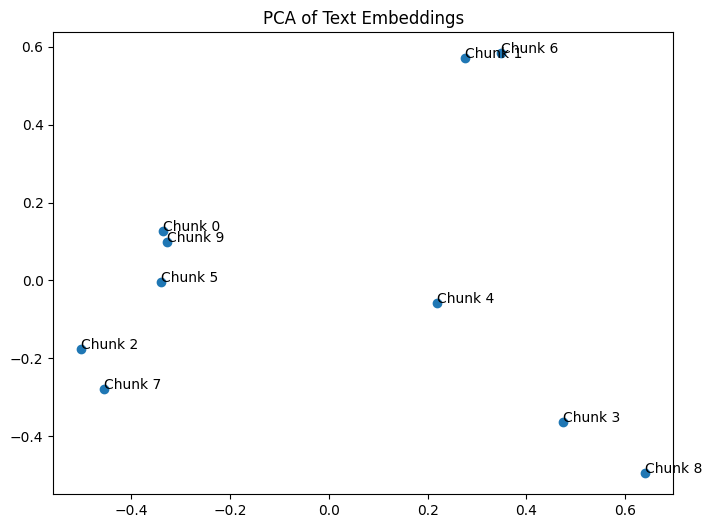

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(sample_embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1])
for i, chunk in enumerate(chunks[:10]):
    plt.annotate(f"Chunk {i}", (reduced[i, 0], reduced[i, 1]))
plt.title("PCA of Text Embeddings")
plt.show()


Store Embeddings in a FAISS Index for Similarity Search:

In [7]:
import faiss
import numpy as np

index = faiss.IndexFlatL2(embeddings[0].shape[0])
index.add(np.array(embeddings))

# Search
query = "Who is always sad?"
query_embedding = model.encode([query])
D, I = index.search(np.array(query_embedding), k=3)

In [8]:
for i in I[0]:
    print(chunks[i])
    print("....")

"You seem so sad, Eeyore."

"Sad? Why should I be sad? It's my birthday. The happiest day of the
year."

"Your birthday?" said Pooh in great surprise.

"Of course it is. Can't you see? Look at all the
....
yore is in
a Very Sad Condition, because it's his birthday, and nobody has taken
any notice of it, and he's very Gloomy--you know what Eeyore is--and
there he was, and----What a long time whoever live
....
ng miserable
myself, what with no presents and no cake and no candles, and no proper
notice taken of me at all, but if everybody else is going to be
miserable too----"

This was too much for Pooh. "St
....


Build the Prompt from Retrieved Chunks:

In [9]:

retrieved_chunks = [chunks[i] for i in I[0]]

# Format the prompt
context = "\n\n".join(retrieved_chunks)
#query = "What is the capital of France?"

prompt = f"""You are a helpful assistant. Use the following context to answer the question.

Context:
{context}

Question:
{query}

Answer:"""

print(prompt)

You are a helpful assistant. Use the following context to answer the question.

Context:
"You seem so sad, Eeyore."

"Sad? Why should I be sad? It's my birthday. The happiest day of the
year."

"Your birthday?" said Pooh in great surprise.

"Of course it is. Can't you see? Look at all the

yore is in
a Very Sad Condition, because it's his birthday, and nobody has taken
any notice of it, and he's very Gloomy--you know what Eeyore is--and
there he was, and----What a long time whoever live

ng miserable
myself, what with no presents and no cake and no candles, and no proper
notice taken of me at all, but if everybody else is going to be
miserable too----"

This was too much for Pooh. "St

Question:
Who is always sad?

Answer:


Generate an Answer Using a Lightweight Language Model:

In [10]:

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

# Load a small, instruction-tuned model
model_name = "google/flan-t5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Build prompt from chunks
retrieved_chunks = [chunks[i] for i in I[0]]
context = "\n\n".join(retrieved_chunks)


# Simple instruction-style prompt for T5
prompt = f"Answer the question based on the context.\n\nContext:\n{context}\n\nQuestion:\n{query}"

# Tokenize input
inputs = tokenizer(prompt, return_tensors="pt", truncation=True)

# Generate output
with torch.no_grad():
    outputs = model.generate(**inputs, max_new_tokens=100)

# Decode and print
answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Answer:", answer)

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Answer: Eeyore


### Performance Observations

- **Query 1**: "Who is Winnie the Pooh?" - Retrieved top-k chunks focus on Pooh's identity and characteristics.
- **Query 2**: "Tell me about Pooh." - Retrieved chunks include more **descriptive information** about Pooh.
- **Query 3**: "What is the plot of Winnie the Pooh?" - Retrieved chunks contain more of the **story** and overall plot.
- **Query 4**: "Who is the protagonist in the story?" - Similar to Query 1, but retrieved chunks could be **more focused on his role in the story**.

The differences in performance happen because each query targets slightly different aspects of the text, leading FAISS to retrieve different chunks.
